### ARBOL DE DECISION

## Marly Benitez

In [337]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report)

In [365]:
#Cargamos el dataset (leer la base de datos)
data = pd.read_csv("winequality-red.csv")
#Visualizamos las 5 primeras lineas
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [367]:
#Se visualiza la cantidad de filas y columnas. 
data.shape

(1599, 12)

In [369]:
#Se obtiene un resumen estadistico de las variables numericas. 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [435]:
#Verificamos si existen valores nulos. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [371]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

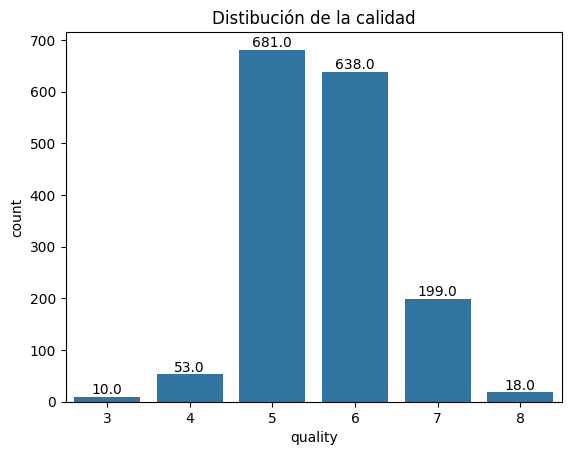

In [373]:
ax = sns.countplot(x= 'quality', data=data) 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords= 'offset points')
    
plt.title('Distibución de la calidad')
plt.show()

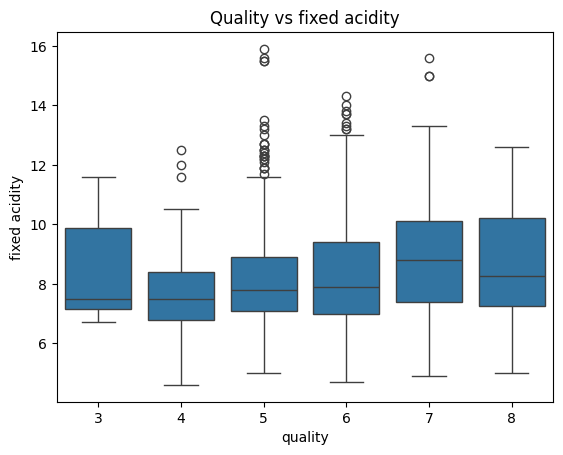

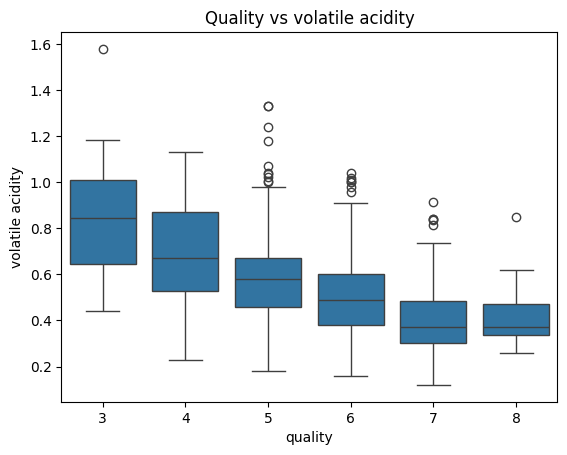

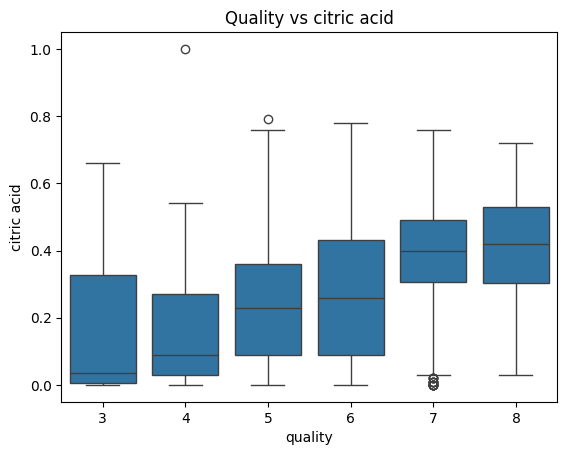

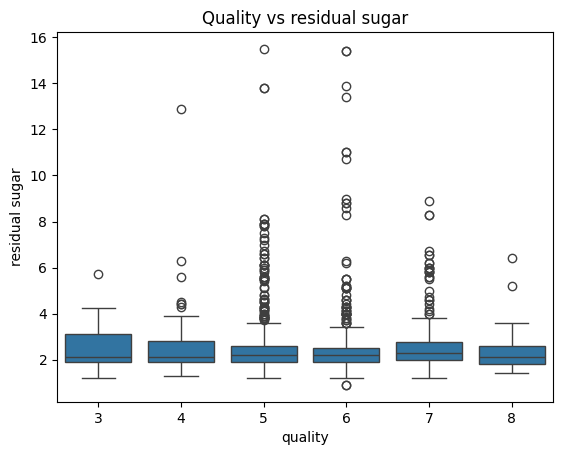

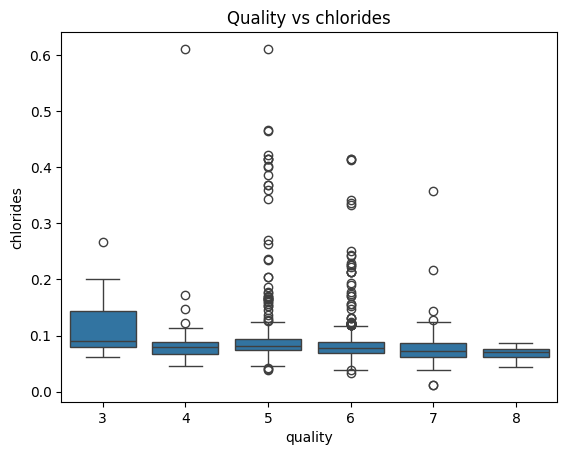

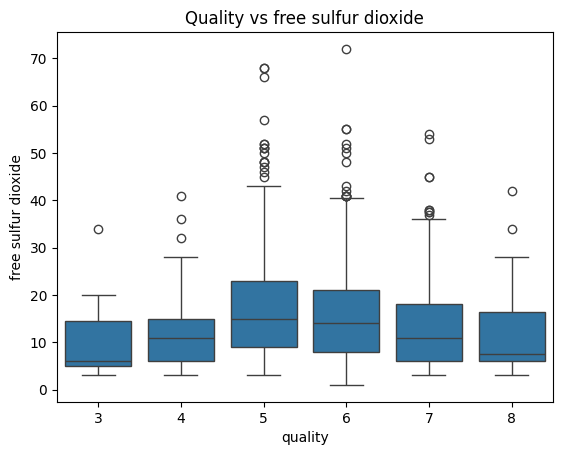

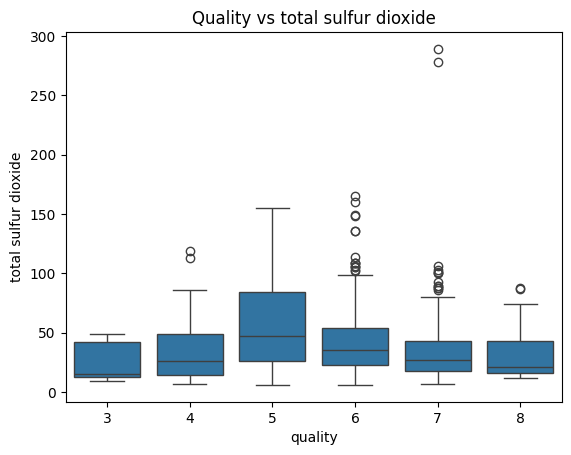

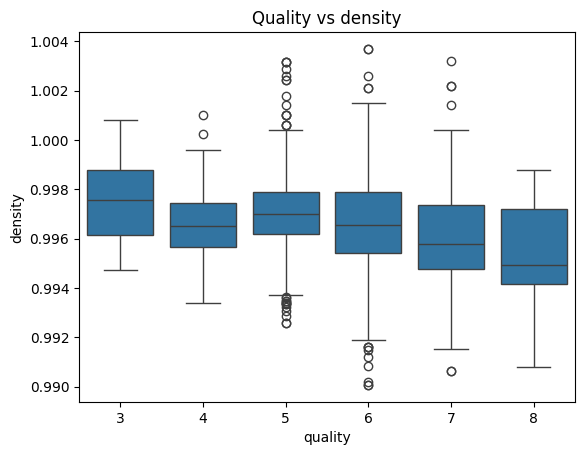

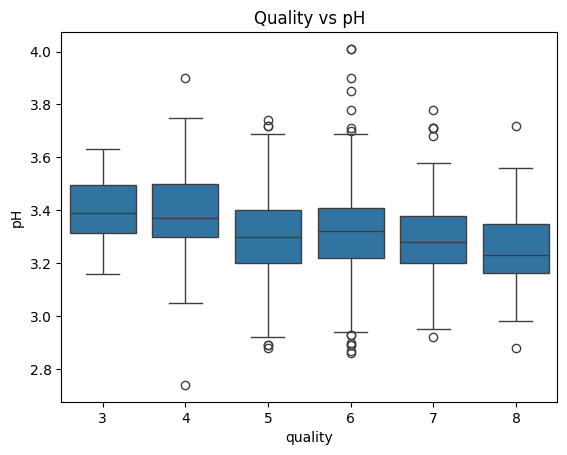

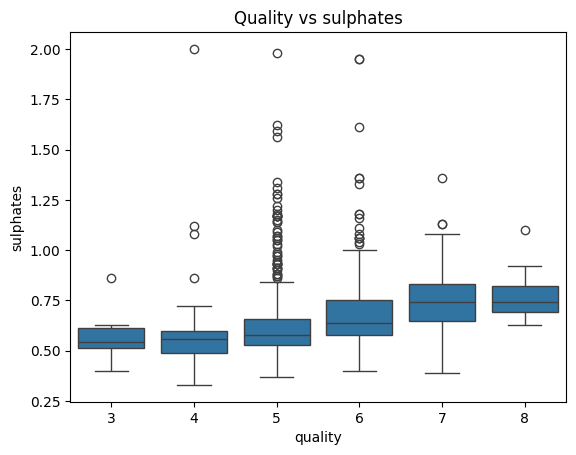

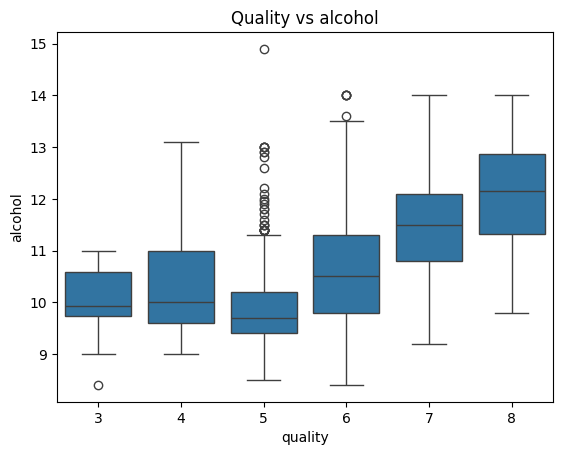

In [413]:
#Diagrama de cajas para identificar valores atipicos. 
cols =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
for col in cols: 
    sns.boxplot(data=data, x='quality', y=col) 
    plt.title(f'Quality vs {col}') 
    plt.show()


<Axes: xlabel='alcohol', ylabel='pH'>

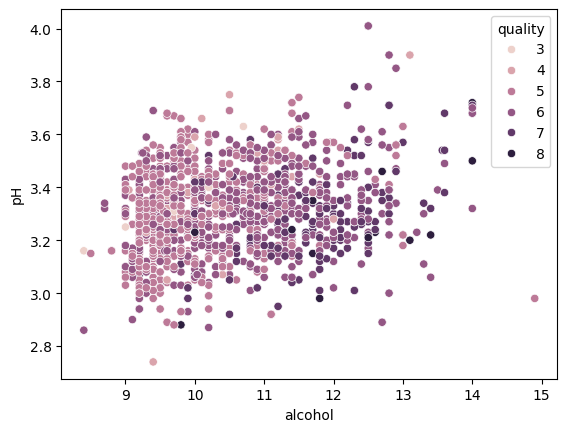

In [417]:
#Diagrama de dispersion sobre la densidad y pH del vino con respecto a la callidad.
sns.scatterplot(x = "alcohol", y = "pH", hue = "quality", data = data)

In [381]:
data_log=data.copy()
for col in cols:
    data_log[col]=np.log1p(data_log[col])

In [385]:
data_log.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5
1,2.174752,0.631272,0.000000,1.280934,0.093490,3.258097,4.219508,0.691546,1.435085,0.518794,2.379546,5
2,2.174752,0.565314,0.039221,1.193922,0.088011,2.772589,4.007333,0.691646,1.449269,0.500775,2.379546,5
3,2.501436,0.246860,0.444686,1.064711,0.072321,2.890372,4.110874,0.692147,1.425515,0.457425,2.379546,6
4,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5


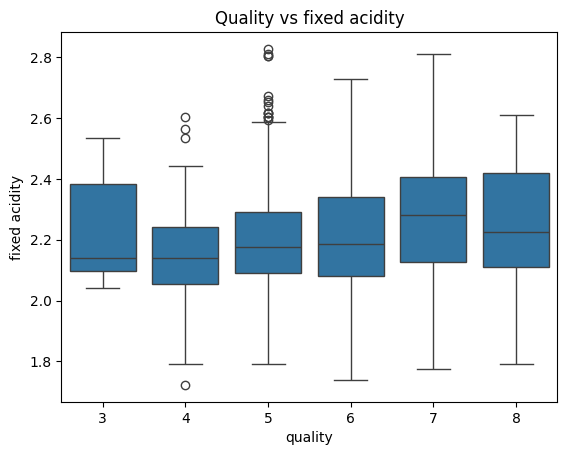

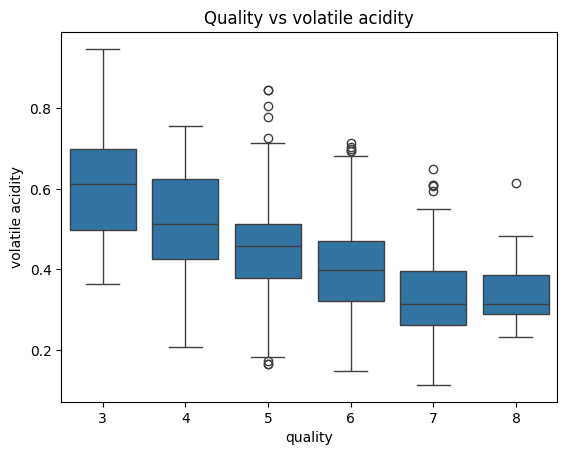

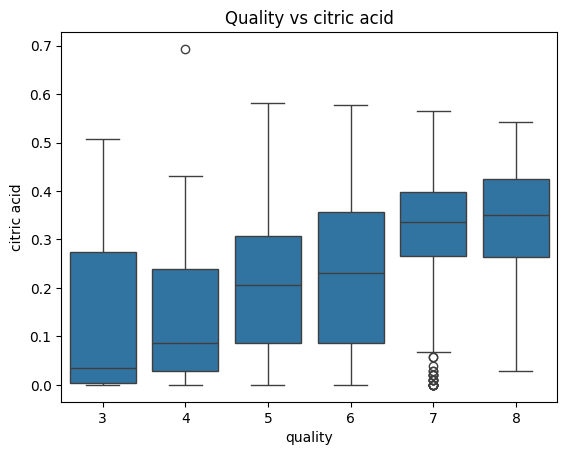

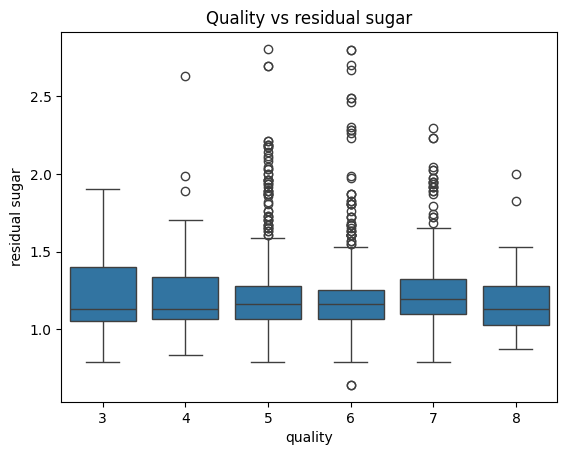

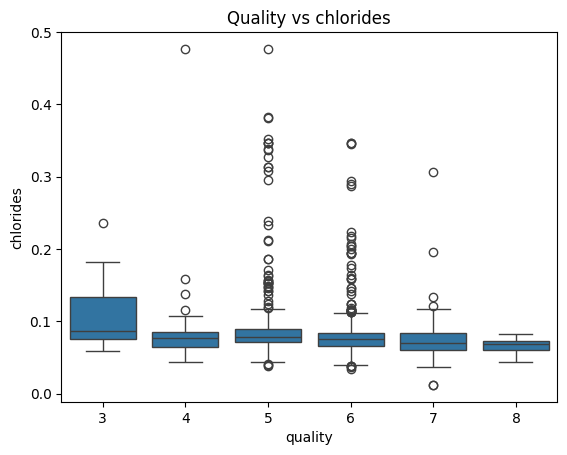

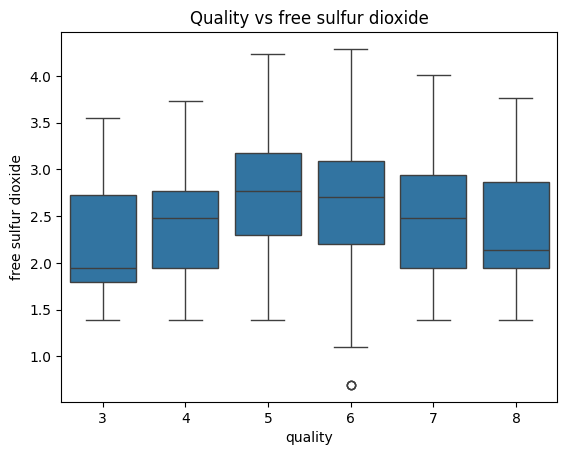

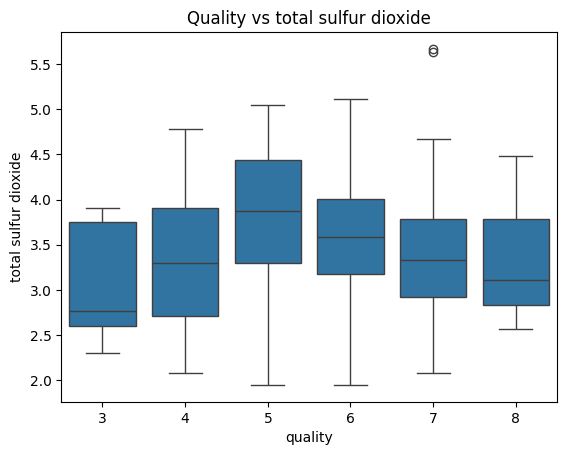

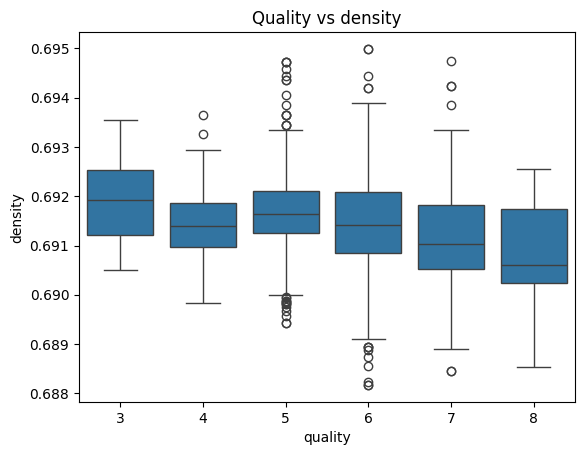

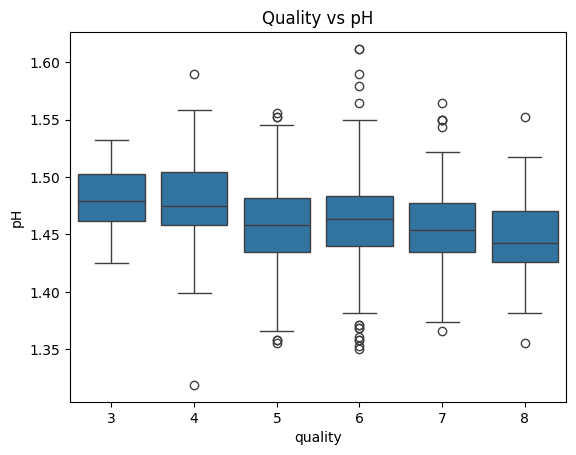

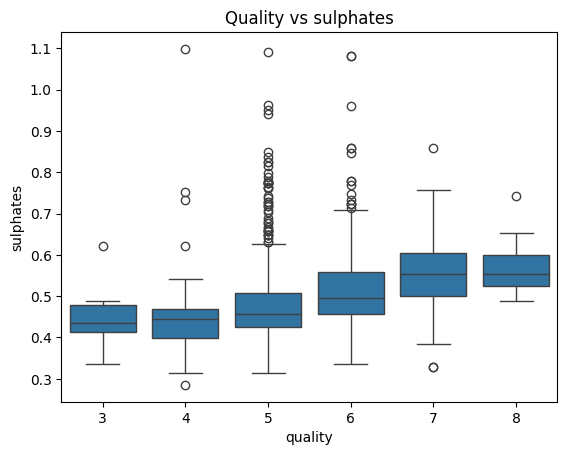

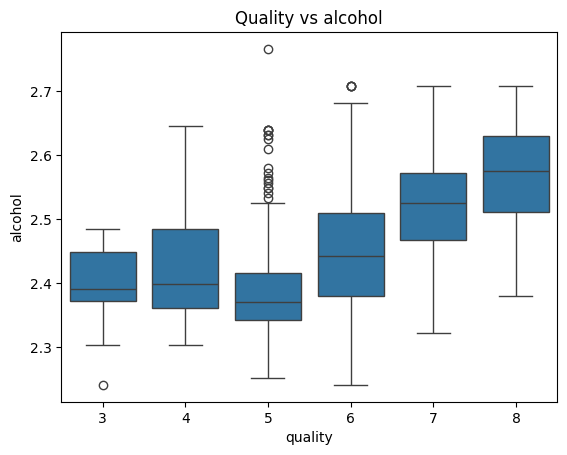

In [387]:
for col in cols: 
    sns.boxplot(data=data_log, x='quality', y=col) 
    plt.title(f'Quality vs {col}') 
    plt.show()

In [433]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
X = data.drop('quality', axis=1) 
y=data['quality'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(y_train.value_counts()) 
print(y_test.value_counts())

quality
5    551
6    506
7    157
4     43
8     13
3      9
Name: count, dtype: int64
quality
6    132
5    130
7     42
4     10
8      5
3      1
Name: count, dtype: int64


In [215]:
model_col= [] 
for col in cols: 
    model_col.append(col) 
    model = RandomForestClassifier(random_state=0) 
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col]) 
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.4
Precisión con ['fixed acidity', 'volatile acidity']: 0.53125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.553125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.55625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.565625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.59375
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.628125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']: 0.640625
Pre

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42) 
print(y_train.value_counts()) 
print(y_test.value_counts())

quality
5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64
quality
5    136
6    128
7     40
4     11
8      3
3      2
Name: count, dtype: int64


In [393]:
model_col= [] 
for col in cols: 
    model_col.append(col) 
    model = RandomForestClassifier(random_state=0) 
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col]) 
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.434375
Precisión con ['fixed acidity', 'volatile acidity']: 0.571875
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.58125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.6
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.6
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.63125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.640625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.66875
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']: 0.6375
Precisi

In [397]:
X = data_log.drop('quality', axis=1) 
y=data_log['quality'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [399]:
model_col= [] 
for col in cols: 
    model_col.append(col) 
    model = RandomForestClassifier(random_state=0) 
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col]) 
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.4
Precisión con ['fixed acidity', 'volatile acidity']: 0.525
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.55625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.55625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.55
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.58125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.60625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.63125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']: 0.646875
Precisión

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42) 
model_col= [] 
for col in cols: 
    model_col.append(col) 
    model = RandomForestClassifier(random_state=0) 
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col]) 
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.434375
Precisión con ['fixed acidity', 'volatile acidity']: 0.565625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.584375
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.59375
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.60625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.615625
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.63125
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.65
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']: 0.6375
P

In [353]:
predictors_col = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target_col = ['quality']

In [44]:
predictors = data[predictors_col]
target = data[target_col]

In [46]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


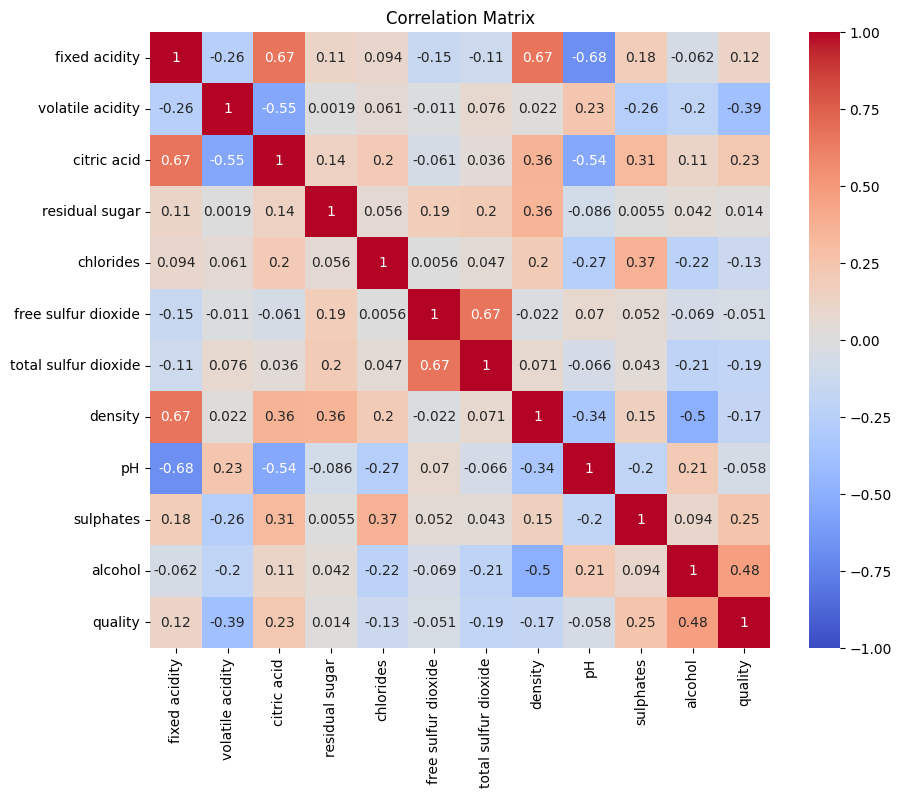

In [177]:

correlation_matrix = data.corr() 
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
plt.title('Correlation Matrix') 
plt.show()

In [48]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [50]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [429]:
quality_correlation = correlation_matrix['quality'].sort_values(ascending= False)
print(quality_correlation)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [345]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [347]:
tree = DecisionTreeClassifier()

In [349]:
arbol = tree.fit(X_train, y_train)

[Text(0.5122721724675013, 0.9772727272727273, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.23425986940633797, 0.9318181818181818, 'x[9] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.37326602093691963, 0.9545454545454546, 'True  '),
 Text(0.04109506978973222, 0.8863636363636364, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.01533576948421494, 0.8409090909090909, 'x[4] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.011501827113161205, 0.7954545454545454, 'x[2] <= 0.375\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.00766788474210747, 0.75, 'x[2] <= 0.29\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.003833942371053735, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.011501827113161205, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 

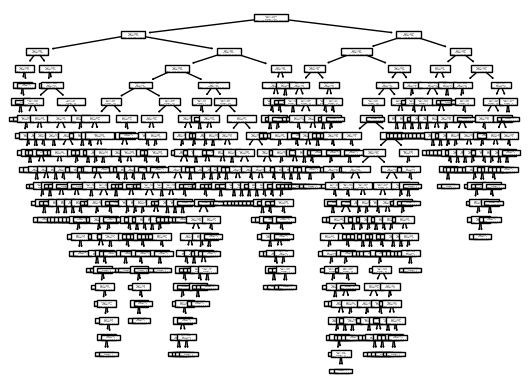

In [351]:
plot_tree(arbol)

In [62]:
predicciones = arbol.predict(X_test)

In [64]:
predicciones

array([7, 7, 5, 5, 6, 5, 5, 8, 5, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       4, 5, 6, 8, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 6, 7, 7, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 7,
       7, 7, 6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 5, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 4, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       5, 5, 6, 5, 6, 6, 5, 6, 4, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5,

In [66]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
3,0,1,0,0,0
4,3,4,0,1,0
5,1,109,31,5,0
6,2,35,76,10,1
7,0,3,10,20,2
8,0,2,2,2,0


In [425]:
accuracy_score(y_test,y_pred)
print('Accuracy:%f'% accuracy)

Accuracy:0.671875


In [423]:
sklearn.metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0) 
print('Precision:%f'% precision)

Precision:0.656640


In [333]:
recall = recall_score(y_test, predicciones, average='weighted')
print ('Recall: %f' % recall)

Recall: 0.340625


In [335]:
f1=f1_score(y_test, predicciones, average='weighted')
print ('F1: %f' % f1)

F1: 0.333850


In [427]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.64      0.71      0.67       128
           7       0.67      0.50      0.57        40
           8       0.50      0.33      0.40         3

    accuracy                           0.67       320
   macro avg       0.42      0.38      0.40       320
weighted avg       0.65      0.67      0.66       320

